In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import scipy.stats as stats

Now it's time to play with some data. You're going to work through the stages of model preparation we've covered in this lesson and write up each one. Keep a good record in a Jupyter notebook – we'll come back to your features in a future model-building assignment on Least Squares Regression.
Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far. 
Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.
Finally, use filtering methods to select the five best features and justify your choices.

In [2]:
# Import data file with lots of variables
data = pd.read_csv('economicdata2016-2016.csv')

In [3]:
# review the data
data.head(10)

,Year,ISO_Code,Countries,SUMMARY INDEX,Quartile,Government Consumption,1A data,Transfers and subsidies,1B data,Government enterprises and investment,...,Conscription,Labor market regulations,Administrative requirements,Bureaucracy costs,Starting a business,Extra payments/bribes/favoritism,Licensing restrictions,Tax compliance,Business regulations,Regulation
0,2016,AGO,Angola,5.17,4,7.60,14.16,8.89,4.59,0.0,...,0,4.56,2.76,1.33,8.66,1.95,8.10,6.78,4.93,5.52
1,2016,ALB,Albania,7.54,1,8.23,12.01,7.51,9.64,8.0,...,10,6.92,6.07,6.00,9.71,4.05,7.32,7.07,6.71,6.91
2,2016,ARE,Unit. Arab Em.,7.50,1,6.07,19.35,8.82,4.84,2.0,...,0,6.96,7.25,5.78,9.59,8.47,10.00,9.87,8.49,7.38
3,2016,ARG,Argentina,4.84,4,5.34,21.86,6.05,15.00,6.0,...,10,5.15,2.40,6.67,9.12,3.26,5.25,6.51,5.54,5.37
4,2016,ARM,Armenia,7.57,1,7.26,15.30,7.75,8.76,8.0,...,0,6.23,4.55,6.00,9.85,4.58,9.32,6.49,6.80,7.38
5,2016,AUS,Australia,7.98,1,4.51,24.66,6.66,12.74,10.0,...,10,7.70,3.81,10.00,9.91,7.24,8.94,8.82,8.12,8.47
6,2016,AUT,Austria,7.58,1,3.74,27.27,3.10,25.82,10.0,...,3,5.57,4.15,8.89,9.23,6.42,7.30,8.53,7.42,7.37
7,2016,AZE,Azerbaijan,6.49,3,6.32,18.51,7.88,8.28,0.0,...,1,6.08,6.07,6.44,9.84,5.35,6.96,7.81,7.08,6.87
8,2016,BDI,Burundi,5.92,4,5.96,19.73,10.00,0.47,2.0,...,10,7.80,3.43,2.67,9.52,3.30,9.76,7.40,6.01,6.27
9,2016,BEL,Belgium,7.32,2,2.49,31.53,2.01,29.82,10.0,...,10,7.33,3.42,8.67,9.76,6.47,7.46,8.48,7.37,8.10


In [4]:
# consider variability and missing data
data.describe()

,Year,SUMMARY INDEX,Quartile,Government Consumption,1A data,Transfers and subsidies,1B data,Government enterprises and investment,1C data,Top marginal income tax rate,...,Conscription,Labor market regulations,Administrative requirements,Bureaucracy costs,Starting a business,Extra payments/bribes/favoritism,Licensing restrictions,Tax compliance,Business regulations,Regulation
count,162.0,162.000000,162.000000,162.000000,162.000000,151.000000,151.000000,157.000000,144.000000,162.000000,...,162.000000,162.000000,152.000000,162.000000,162.000000,152.000000,159.000000,162.000000,162.000000,162.000000
mean,2016.0,6.793827,2.487654,5.596914,21.314630,7.645695,9.131987,6.261146,26.264514,7.524691,...,6.586420,6.376111,4.075329,5.260802,9.128889,4.441711,8.310314,7.282346,6.454198,7.016481
std,0.0,0.886369,1.121432,2.326015,8.958366,2.062765,7.579544,3.002449,14.664730,2.262853,...,4.268395,1.370861,1.231918,2.751454,0.943984,1.755361,1.149275,1.743374,1.194134,1.029759
min,2016.0,2.880000,1.000000,0.000000,5.290000,2.010000,0.190000,0.000000,4.050000,1.000000,...,0.000000,2.110000,1.080000,0.000000,3.330000,1.520000,4.990000,0.000000,2.010000,2.480000
25%,2016.0,6.260000,1.250000,4.122500,15.082500,6.295000,2.475000,4.000000,15.720000,6.000000,...,3.000000,5.330000,3.235000,3.110000,8.922500,3.090000,7.610000,6.902500,5.797500,6.480000
50%,2016.0,6.905000,2.000000,5.665000,20.740000,8.130000,7.350000,7.000000,22.585000,8.000000,...,10.000000,6.470000,3.985000,5.335000,9.440000,4.015000,8.520000,7.625000,6.390000,7.060000
75%,2016.0,7.467500,3.000000,7.332500,25.985000,9.460000,14.100000,8.000000,32.122500,10.000000,...,10.000000,7.367500,4.740000,7.502500,9.667500,5.582500,9.195000,8.310000,7.247500,7.715000
max,2016.0,8.970000,4.000000,10.000000,56.680000,10.000000,29.820000,10.000000,77.110000,10.000000,...,10.000000,9.370000,7.690000,10.000000,9.980000,8.760000,10.000000,9.870000,9.270000,9.440000


In [5]:
#  Use Government Consumption, Labor market regulations, bureaucracy costs and Business regulations
# as continuous variables - they all have all 162 results. ISO Code and Countries will be the categorical
# variable - note the 2 variables have a one-to-one value correspondence
# get subset of data that wish to work with
sd = pd.DataFrame()
sd = data[['ISO_Code','Countries','Government Consumption','Labor market regulations','Bureaucracy costs','Business regulations']]

In [6]:
# Check for normal distributions
print(stats.normaltest(data['Government Consumption']))
print(stats.normaltest(data['Labor market regulations']))
print(stats.normaltest(data['Bureaucracy costs']))
stats.normaltest(data['Business regulations'])

NormaltestResult(statistic=5.34176054682241, pvalue=0.06919129123999465)
NormaltestResult(statistic=1.99278013481186, pvalue=0.36920986107510967)
NormaltestResult(statistic=21.790730037027878, pvalue=1.8543986144910084e-05)


NormaltestResult(statistic=8.599552315035691, pvalue=0.013571596572084276)

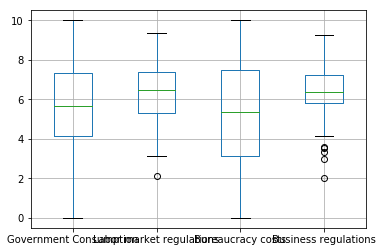

In [7]:
# Basic look at data points
sd.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275D7834518>,
      dtype=object)

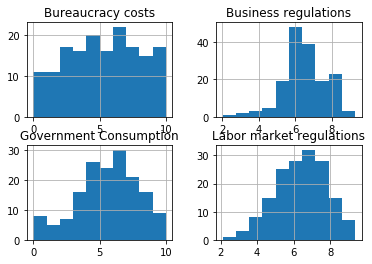

In [8]:
# quite a few outliers in the regulation categories
# Check for normal distributions visually
sd.hist()

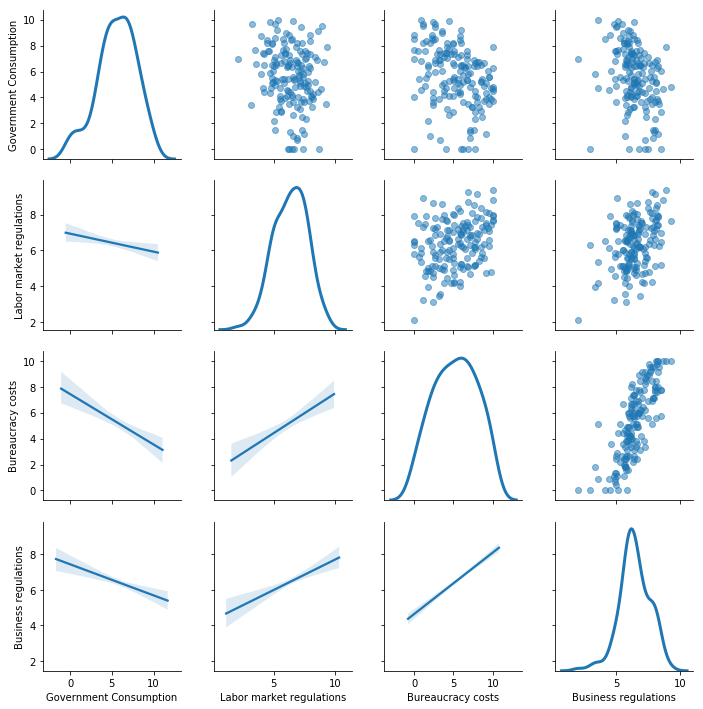

In [9]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(sd.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                          Government Consumption  Labor market regulations  \
Government Consumption                  1.000000                 -0.171098   
Labor market regulations               -0.171098                  1.000000   
Bureaucracy costs                      -0.328820                  0.304782   
Business regulations                   -0.339088                  0.390673   

                          Bureaucracy costs  Business regulations  
Government Consumption            -0.328820             -0.339088  
Labor market regulations           0.304782              0.390673  
Bureaucracy costs                  1.000000              0.793385  
Business regulations               0.793385              1.000000  


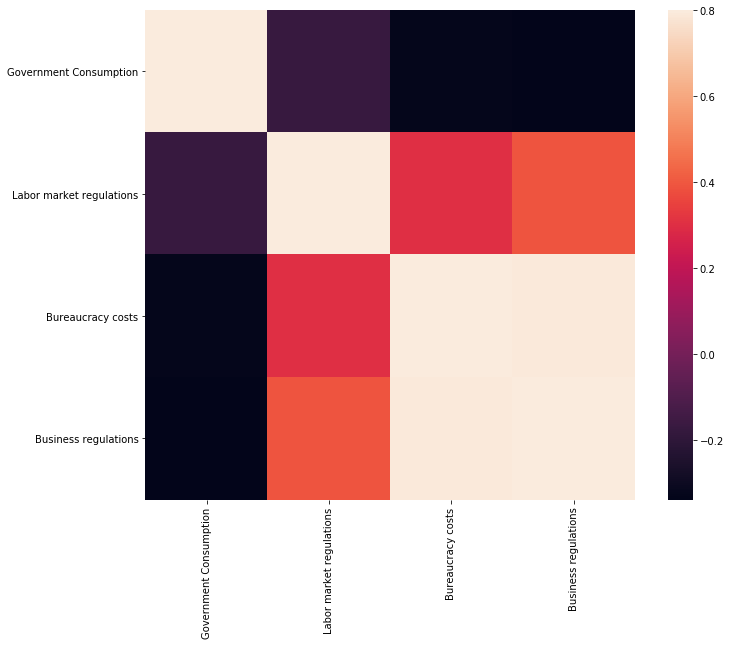

In [10]:
# Make the correlation matrix.
corrmat = sd.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [11]:
# Get just the continuous variables
sd_pca = sd[['Government Consumption','Labor market regulations','Bureaucracy costs','Business regulations']].dropna()
# Normalize the data so that all variables have a mean of 0 and standard deviation of 1.
X = StandardScaler().fit_transform(sd_pca)

# The NumPy covariance function assumes that variables are represented by rows, not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00621118 -0.17216083 -0.33086199 -0.34119414]
 [-0.17216083  1.00621118  0.3066754   0.3930994 ]
 [-0.33086199  0.3066754   1.00621118  0.79831317]
 [-0.34119414  0.3930994   0.79831317  1.00621118]]


In [12]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 4).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.37640388]
 [-0.38857379]
 [-0.58543334]
 [-0.60381979]]
Eigenvalue 1: 2.2458758677326474
----------------------------------------
Eigenvector 2: 
[[-0.73958141]
 [-0.67037467]
 [ 0.02558027]
 [-0.05443151]]
Eigenvalue 2: 0.8364929641161164
----------------------------------------
Eigenvector 3: 
[[-0.557929  ]
 [ 0.62525429]
 [-0.43790627]
 [-0.3255924 ]]
Eigenvalue 3: 0.7403485709394106
----------------------------------------
Eigenvector 4: 
[[ 0.00739592]
 [-0.09308751]
 [-0.68180023]
 [ 0.7255539 ]]
Eigenvalue 4: 0.20212731770871914
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.55800311 0.20783236 0.18394463 0.0502199 ]


In [34]:
#  Add some features.  First, add a country grouping so that can view results at a higher level
#  Assign low, medium and high ranking based on Summary Index variable
#  Lowest score in summary index was 2.88 and highest score is 8.97 and the mean is 6.8 with the first 
#  quartile at 6.26 so very few countries score below this.  So, very low cat will be added for these outliers
#  and cats assigned at quartile intervals
ranks = []
cats = []
for value in data['SUMMARY INDEX']:
    if value <= 6.26:
        cats.append("V_Low")
        ranks.append(1)
    elif value > 7.465:
        ranks.append(4)
        cats.append("High")
    elif value > 6.26 and value <= 6.905:
        ranks.append(2)
        cats.append("Low")
    else:
        ranks.append(3)
        cats.append("Med")
data['Rank'] = ranks
data['Rank Cat'] = cats

In [37]:
data.describe()

,Year,SUMMARY INDEX,Quartile,Government Consumption,1A data,Transfers and subsidies,1B data,Government enterprises and investment,1C data,Top marginal income tax rate,...,Labor market regulations,Administrative requirements,Bureaucracy costs,Starting a business,Extra payments/bribes/favoritism,Licensing restrictions,Tax compliance,Business regulations,Regulation,Rank
count,162.0,162.000000,162.000000,162.000000,162.000000,151.000000,151.000000,157.000000,144.000000,162.000000,...,162.000000,152.000000,162.000000,162.000000,152.000000,159.000000,162.000000,162.000000,162.000000,162.000000
mean,2016.0,6.793827,2.487654,5.596914,21.314630,7.645695,9.131987,6.261146,26.264514,7.524691,...,6.376111,4.075329,5.260802,9.128889,4.441711,8.310314,7.282346,6.454198,7.016481,2.500000
std,0.0,0.886369,1.121432,2.326015,8.958366,2.062765,7.579544,3.002449,14.664730,2.262853,...,1.370861,1.231918,2.751454,0.943984,1.755361,1.149275,1.743374,1.194134,1.029759,1.127025
min,2016.0,2.880000,1.000000,0.000000,5.290000,2.010000,0.190000,0.000000,4.050000,1.000000,...,2.110000,1.080000,0.000000,3.330000,1.520000,4.990000,0.000000,2.010000,2.480000,1.000000
25%,2016.0,6.260000,1.250000,4.122500,15.082500,6.295000,2.475000,4.000000,15.720000,6.000000,...,5.330000,3.235000,3.110000,8.922500,3.090000,7.610000,6.902500,5.797500,6.480000,1.250000
50%,2016.0,6.905000,2.000000,5.665000,20.740000,8.130000,7.350000,7.000000,22.585000,8.000000,...,6.470000,3.985000,5.335000,9.440000,4.015000,8.520000,7.625000,6.390000,7.060000,2.500000
75%,2016.0,7.467500,3.000000,7.332500,25.985000,9.460000,14.100000,8.000000,32.122500,10.000000,...,7.367500,4.740000,7.502500,9.667500,5.582500,9.195000,8.310000,7.247500,7.715000,3.750000
max,2016.0,8.970000,4.000000,10.000000,56.680000,10.000000,29.820000,10.000000,77.110000,10.000000,...,9.370000,7.690000,10.000000,9.980000,8.760000,10.000000,9.870000,9.270000,9.440000,4.000000


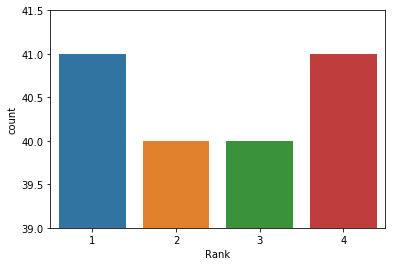

In [53]:
# See results of adding rank groupings
sns.countplot(data['Rank'])
plt.ylim(39,41.5)
plt.show()

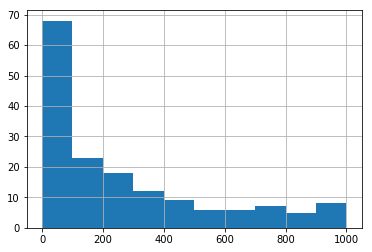

In [56]:
# Cube the Bureacracy variable to create a more log normal distrib
data['BC_cubed'] = data['Bureaucracy costs'] * data['Bureaucracy costs'] *  data['Bureaucracy costs']
data['BC_cubed'].hist()

In [80]:
# add a category to compare North American countries with the rest of the world
data['N_Amer'] = np.where(data['ISO_Code'] == "USA",True,np.where(data['ISO_Code'] == "CAN",True,np.where(data['ISO_Code'] == "MEX",True,False)))
data[data['N_Amer'] == True]

,Year,ISO_Code,Countries,SUMMARY INDEX,Quartile,Government Consumption,1A data,Transfers and subsidies,1B data,Government enterprises and investment,...,Regulation,Rank Cat,Rank,BC_squared,Regs,GC_cubed,Composite,Reg Rank,Reg Rank Cat,N_Amer
26,2016,CAN,Canada,7.98,1,3.92,26.66,7.17,10.88,8.0,...,8.51,High,4,756.058031,62.5770,60.236288,2234.699762,4,High,True
95,2016,MEX,Mexico,6.90,2,7.31,15.15,6.35,13.88,10.0,...,7.11,Low,2,296.740963,35.7678,390.617891,1743.955662,2,Low,True
155,2016,USA,United States,8.03,1,6.71,17.17,5.99,15.21,8.0,...,8.83,High,4,512.000000,73.2114,302.111711,3929.987952,4,High,True


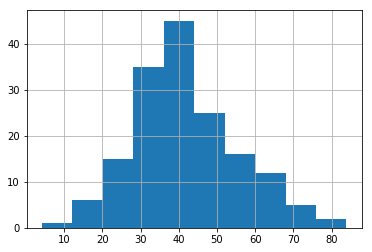

In [57]:
# Create a combined feature of regulatory variables
data['Regs'] = data['Labor market regulations'] * data['Business regulations']
data['Regs'].hist()

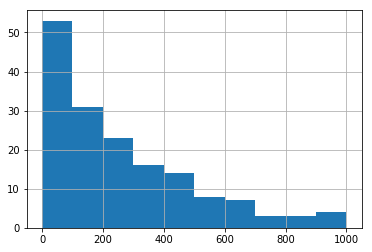

In [59]:
# Cube the Consumption variable to create a more log normal distrib
data['GC_cubed'] = data['Government Consumption'] * data['Government Consumption'] * data['Government Consumption']
data['GC_cubed'].hist()

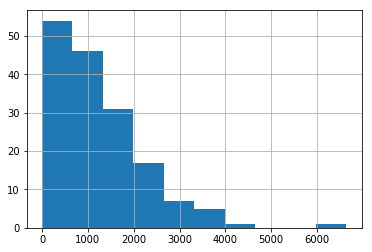

In [61]:
# Add a feature to composite the four variables
data['Composite'] = data['Government Consumption'] * data['Labor market regulations'] * data['Business regulations'] * data['Bureaucracy costs']
data['Composite'].hist()

In [62]:
data['Regs'].describe()

count    162.000000
mean      41.788261
std       13.630852
min        4.241100
25%       32.879250
50%       40.641200
75%       50.273025
max       83.861500
Name: Regs, dtype: float64

In [63]:
# Add rank and category features based on Regulatory quartile
reg_ranks = []
reg_cats = []
for value in data['Regs']:
    if value <= 32.87925:
        reg_cats.append("V_Low")
        reg_ranks.append(1)
    elif value > 50.273025:
        reg_ranks.append(4)
        reg_cats.append("High")
    elif value > 32.87925 and value <= 40.6412:
        reg_ranks.append(2)
        reg_cats.append("Low")
    else:
        reg_ranks.append(3)
        reg_cats.append("Med")
data['Reg Rank'] = reg_ranks
data['Reg Rank Cat'] = reg_cats

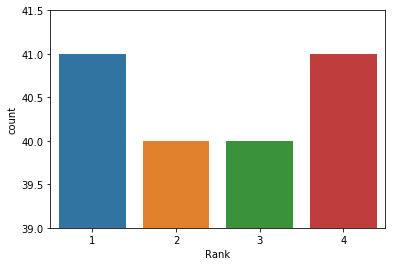

In [67]:
# See results of adding rank groupings
sns.countplot(data['Rank'])
plt.ylim(39,41.5)
plt.show()